## MDI230 : Queueing theory

### Simulation épidémie

#### Rémi Jaylet, Augustin Laboulet, Romain Louvet

### Imports

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp

### Definition des paramètres

On cherche ici à modéliser une épidémie, en suivant le cours on utilise les notations suivantes :

$N$ la taille de la population

$S(t)$ le nombre d'individus susceptibles d'être contaminés ($s(t)$ en pourcentage)

$I(t)$ le nombre d'individus infectés ($i(t)$ en pourcentage)

$R(t)$ les retirés, ceux qui ne sont plus contaminables soient parce qu'ils sont décédés, soient parce que guéris et immunisés  ($r(t)$ en pourcentage)

$\beta$ paramètre lois de Poisson pour un infecté de rencontré un invidu susceptible

$\gamma$ le temps moyen d'infection

$R_0$ le nombre moyen de personnes contaminées par jour en moyenne. (Rq : $R_0 = \beta/\gamma)$ 

### Résolution du système déterministe SIR

On a le système suivant : 

* $s(t) + i(t) + r(t) = 1$

* $s'(t) = -\beta s(t) i(t)$

* $i'(t) = -\gamma i(t) + \beta i(t) s(t)$

* $r'(t) = \gamma i(t)$

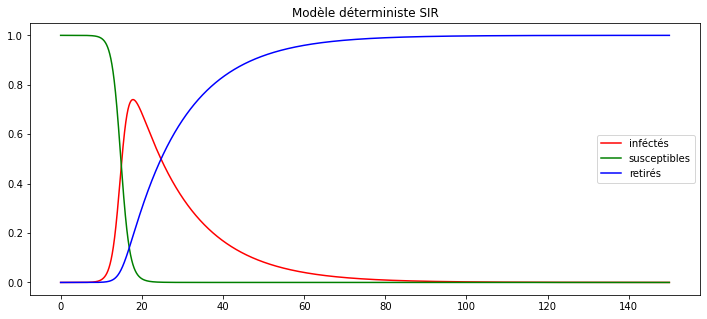

In [17]:
gamma = 1/14  #
beta = 1  # une rencontre par jour en moyenne 

# Conditions initiales
i0 = 0.000001
s0 = 1-i0  
r0 = 0

# Équations
def equadiff(t, Y, gamma, beta):
    di = -gamma*Y[0] +beta*Y[0]*Y[1]
    ds = -beta*Y[0]*Y[1]
    dr = gamma*Y[0]
    return [di, ds, dr]

# Résolution des éuations
sol = solve_ivp(equadiff, [0, 150], [i0, s0, r0], method='RK45', args=(
    gamma, beta), max_step=0.01)


fig = plt.figure(figsize=(12,5))
plt.plot(sol.t, sol.y[0], label="inféctés", color="red")
plt.plot(sol.t, sol.y[1], label="susceptibles", color="green")
plt.plot(sol.t, sol.y[2], label = "retirés", color="blue")
plt.legend()
plt.title("Modèle déterministe SIR")
plt.show()

### Processus de Markov

Pour avoir le même nombre de personnes que dans le modèle précédent on a $N = 1/i_0 - 1$

In [18]:
def markov(I0, S0, R0,t,gamma,beta): 
    Stab,Itab,Rtab=[S0],[I0],[R0]
    N = S0
    S,I,R=S0,I0,R0
    times=[0]
    time=np.random.exponential(1/(I*gamma+beta*I*S/N))

    while time < t and I!=0 :
        r = np.random.rand()
        taux = I*gamma/(I*gamma+beta*I*S/N+1e-10)

        if taux > r : #si cette condition est vérifiée, alors l'individu est guéri
            Stab.append(S)
            Itab.append(I-1)
            Rtab.append(R+1)
            I=I-1
            R=R+1

        else : #sinon une personne est infectée
            Stab.append(S-1)
            Itab.append(I+1)
            Rtab.append(R)
            S=S-1
            I=I+1

        times.append(time)
        time += np.random.exponential(1/(I*gamma+beta*I*S/N+1e-10))

    return(times,Stab,Itab,Rtab)

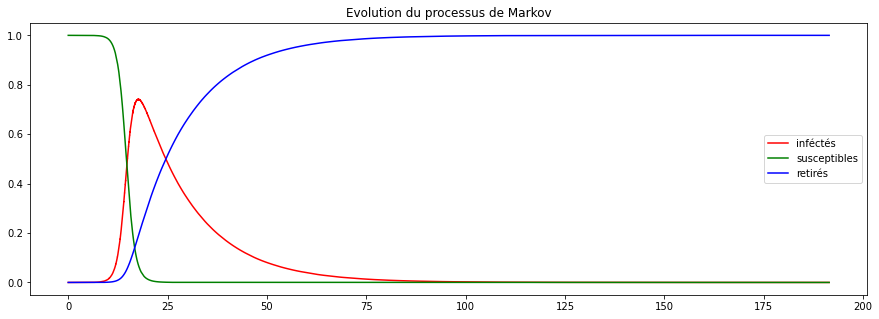

In [19]:
# Définition des conditions initiales
N=int(1/i0)-1
I0 = 1
S0 = N
R0 = 0
gamma = 1/14 #duree d'infection à 14 jours
beta = 1 #en moyenne 0.5 nouvelles personnes par jour

times,S,I,R = markov(I0,S0,R0,200,gamma,beta)

#affichage des résultats 
fig = plt.figure(figsize=(15,5))
plt.plot(times, np.array(I)/(N+1), label="inféctés", color="red")
plt.plot(times, np.array(S)/(N+1), label="susceptibles", color="green")
plt.plot(times, np.array(R)/(N+1), label = "retirés", color="blue")
plt.title("Evolution du processus de Markov")
plt.legend()
plt.show()

### Tests diférents paramètres 

Les deux modèles précédents semblent obtenir les mêmes résultats, on a donc décidé d'utilisé le premier. 

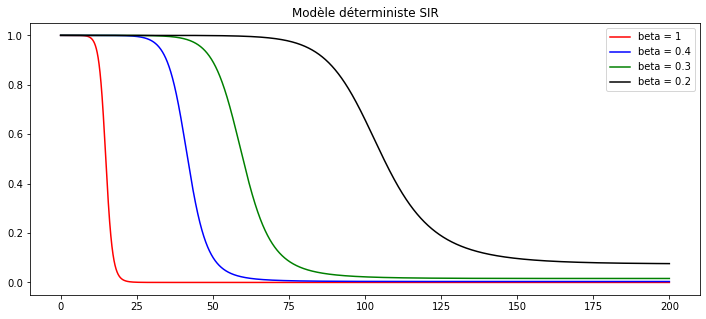

In [36]:
# Résolution des éuations
sol1 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/14, 1), max_step=0.01)

sol2 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/14, 0.4), max_step=0.01)

sol3 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/14, 0.3), max_step=0.01)

sol4 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/14, 0.2), max_step=0.01)


fig = plt.figure(figsize=(12,5))
plt.plot(sol1.t, sol1.y[1], label="beta = 1", color="red")
plt.plot(sol2.t, sol2.y[1], label="beta = 0.4", color="blue")
plt.plot(sol3.t, sol3.y[1], label="beta = 0.3", color="green")
plt.plot(sol4.t, sol4.y[1], label="beta = 0.2", color="black")
plt.legend()
plt.title("Modèle déterministe SIR")
plt.show()

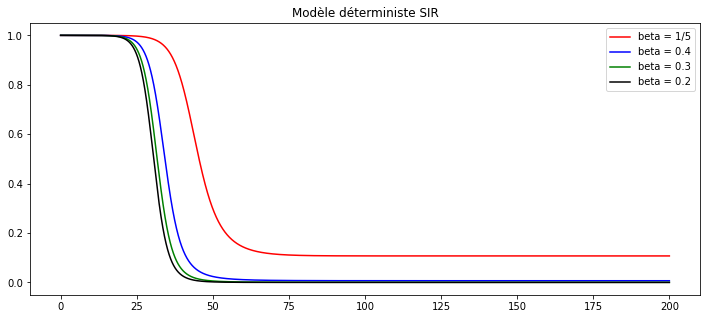

In [37]:
# Résolution des éuations
sol1 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/5, 0.5), max_step=0.01)

sol2 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/10, 0.5), max_step=0.01)

sol3 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/15, 0.5), max_step=0.01)

sol4 = solve_ivp(equadiff, [0, 200], [i0, s0, r0], method='RK45', args=(
    1/20, 0.5), max_step=0.01)


fig = plt.figure(figsize=(12,5))
plt.plot(sol1.t, sol1.y[1], label="beta = 1/5", color="red")
plt.plot(sol2.t, sol2.y[1], label="beta = 0.4", color="blue")
plt.plot(sol3.t, sol3.y[1], label="beta = 0.3", color="green")
plt.plot(sol4.t, sol4.y[1], label="beta = 0.2", color="black")
plt.legend()
plt.title("Modèle déterministe SIR")
plt.show()